In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [121]:
%matplotlib inline

import numpy as np
import pandas as pd
import cPickle as pickle
import os
import json
import matplotlib.pyplot as plt

from code.clusterize import *
from code.shapefiles import merge_shapefiles

In [3]:
df = pickle.load(open('featuresdf.pkl', 'rb'))

In [4]:
files = os.listdir('results')
files = [f for f in files if f[:2] == 'CL']
len(files)

63

In [5]:
files.remove('CL000406.csv')

In [6]:
print len(files)
files[:5]

62


['CL00010203040607.csv',
 'CL000102050608.csv',
 'CL00010304050608.csv',
 'CL0001030408.csv',
 'CL0001030708.csv']

In [7]:
fnums = [fn[2:-4] for fn in files]
fnums.remove('xx')
fnums[:5]

['00010203040607',
 '000102050608',
 '00010304050608',
 '0001030408',
 '0001030708']

In [8]:
fnums = [mapno2list(fn) for fn in fnums]
fnums[:5]

[[0, 1, 2, 3, 4, 6, 7],
 [0, 1, 2, 5, 6, 8],
 [0, 1, 3, 4, 5, 6, 8],
 [0, 1, 3, 4, 8],
 [0, 1, 3, 7, 8]]

In [9]:
fname = [list2fname(fn) for fn in fnums]
fname[:5]

NameError: name 'list2fname' is not defined

In [11]:
%%time
nclusters = 25
cnum = cut2cluster('xx', nclusters)

CPU times: user 44.1 s, sys: 745 ms, total: 44.8 s
Wall time: 46.3 s


In [13]:
df = df.ix[cnum.index]
fn = 'data/uscensus/tl_2010_06075_tabblock10/tl_2010_06075_tabblock10.dbf'
mergedf = merge_shapefiles(df[['lat', 'lon']], fn)
polys = make_shapefiles(df[['lat', 'lon']], mergedf.polys, cnum)

In [14]:
print len(cnum.unique())
print len(polys)
print mergedf.shape

25
25
(7325, 3)


In [51]:
fbars = feature_bars(df[['grocery', 'ncrimes', 'sgnf']], cnum)

In [16]:
alldf = pd.DataFrame({'cnum': cnum.unique(),
                      'polygon': polys})
alldf['color'] = clist = gencolors(nclusters)
alldf['mapno'] = ''
alldf['fbars'] = 0
print alldf.shape
alldf.head()

(25, 5)


,cnum,polygon,color,mapno,fbars
0,0,"POLYGON ((-122.451088 37.749696, -122.451063 3...",#e41a1c,,0
1,1,"(POLYGON ((-122.436138 37.749562, -122.43832 3...",#ae394d,,0
2,2,"(POLYGON ((-122.426737 37.711225, -122.426957 ...",#725c83,,0
3,3,POLYGON ((-122.4103819268249 37.77876979913257...,#377eb8,,0
4,4,"(POLYGON ((-122.376974 37.733616, -122.377041 ...",#3e8e95,,0


In [17]:
len(merge_map_data('results'))

TypeError: merge_map_data() takes exactly 2 arguments (1 given)

In [46]:
%%time
alldf = merge_map_data('results', df)
print alldf.shape
alldf.head()

0002
000206


000207


0003


000305


000508


000607


0008


010208


0103


010307


0104


010405


010406


010506


010508


0107


010708


02


020305


020306


020405


020408


020506


020508


020607


020708


0304


030408


030507


0306


0308


0405


040507


040608


040708


05


050608


050708


07


(1025, 5)
CPU times: user 1h 20min 47s, sys: 1min 16s, total: 1h 22min 4s
Wall time: 1h 24min 13s


In [47]:
gjson = make_json(alldf.cnum, alldf.polygon, alldf.color, alldf.mapno, alldf.fbars)

In [48]:
# file size reduced to ~1/3
with open('results/geo.json', 'wb') as f:
    f.write(json.dumps(gjson))

In [49]:
files = os.listdir('results')
files = [f[2:-4] for f in files if f[:2] == 'CL']
files.remove('xx')
files.remove('000406')

files = [f for f in files if len(f) <= 6]

fnames = [mapno2list(f) for f in files]

print len(files)
files

40


['0002',
 '000206',
 '000207',
 '0003',
 '000305',
 '000508',
 '000607',
 '0008',
 '010208',
 '0103',
 '010307',
 '0104',
 '010405',
 '010406',
 '010506',
 '010508',
 '0107',
 '010708',
 '02',
 '020305',
 '020306',
 '020405',
 '020408',
 '020506',
 '020508',
 '020607',
 '020708',
 '0304',
 '030408',
 '030507',
 '0306',
 '0308',
 '0405',
 '040507',
 '040608',
 '040708',
 '05',
 '050608',
 '050708',
 '07']

In [52]:
fbars

,grocery,ncrimes,sgnf
cnum,,,
0,-0.075225,-0.132240,0.166232
1,0.268824,0.159671,0.113773
2,-0.019000,-0.097440,0.273191
3,0.051762,0.064081,-0.158724
4,0.018590,-0.022405,-0.086109
5,0.058507,-0.097540,0.120285
6,0.152351,0.005968,0.356103
7,0.745499,0.384692,0.117722
8,-0.074078,-0.146812,0.252819


In [53]:
map(list, fbars.round(2).values)

[[-0.080000000000000002, -0.13, 0.17000000000000001],
 [0.27000000000000002, 0.16, 0.11],
 [-0.02, -0.10000000000000001, 0.27000000000000002],
 [0.050000000000000003, 0.059999999999999998, -0.16],
 [0.02, -0.02, -0.089999999999999997],
 [0.059999999999999998, -0.10000000000000001, 0.12],
 [0.14999999999999999, 0.01, 0.35999999999999999],
 [0.75, 0.38, 0.12],
 [-0.070000000000000007, -0.14999999999999999, 0.25],
 [-0.16, -0.14999999999999999, -0.46000000000000002],
 [-0.12, -0.13, 0.17000000000000001],
 [-0.040000000000000001, -0.080000000000000002, 0.28000000000000003],
 [-0.059999999999999998, -0.11, 0.23000000000000001],
 [-0.01, -0.11, 0.17000000000000001],
 [0.02, -0.12, 0.26000000000000001],
 [-0.070000000000000007, -0.14000000000000001, 0.27000000000000002],
 [-0.13, -0.11, 0.02],
 [-0.20000000000000001, 0.83999999999999997, -0.47999999999999998],
 [-0.12, -0.13, 0.28000000000000003],
 [0.29999999999999999, 0.01, 0.26000000000000001],
 [0.080000000000000002, -0.070000000000000007

In [54]:
FDICT = {0: 'taxable_value',
         1: 'grocery',
         2: 'restaurant',
         3: 'retail',
         4: 'ncrimes',
         5: 'sgnf',
         6: 'avg_hh_size',
         7: 'population',
         8: 'walkscore'}

In [57]:
cnum = cut2cluster('010405', nclusters)


In [92]:
#fnames = [mapno2list('010405')]

fbars = feature_bars(df[fnames[13*25]], cnum)
fbars

,grocery,ncrimes,sgnf
cnum,,,
0,0.156137,0.005035,0.254127
1,0.132974,0.019346,0.130852
2,-0.082478,-0.121213,0.215902
3,-0.029638,-0.101004,-0.169889
4,-0.047164,-0.063859,-0.149545
5,0.127047,-0.064807,0.270752
6,0.200874,0.083115,0.271286
7,0.671824,0.450898,-0.145565
8,0.046644,-0.120985,0.011450


In [127]:
files = os.listdir('results')
files = [f[2:-4] for f in files if f[:2] == 'CL']
files.remove('xx')

# incomplete cut list
files.remove('000406')

mapnos = [f for f in files if len(f) <= 6]

fnums = [mapno2list(f) for f in mapnos]

# column names
fnames = map(lambda x: [FDICT[n] for n in x], fnums)
print mapnos
print fnums
print fnames

['0002', '000206', '000207', '0003', '000305', '000508', '000607', '0008', '010208', '0103', '010307', '0104', '010405', '010406', '010506', '010508', '0107', '010708', '02', '020305', '020306', '020405', '020408', '020506', '020508', '020607', '020708', '0304', '030408', '030507', '0306', '0308', '0405', '040507', '040608', '040708', '05', '050608', '050708', '07']
[[0, 2], [0, 2, 6], [0, 2, 7], [0, 3], [0, 3, 5], [0, 5, 8], [0, 6, 7], [0, 8], [1, 2, 8], [1, 3], [1, 3, 7], [1, 4], [1, 4, 5], [1, 4, 6], [1, 5, 6], [1, 5, 8], [1, 7], [1, 7, 8], [2], [2, 3, 5], [2, 3, 6], [2, 4, 5], [2, 4, 8], [2, 5, 6], [2, 5, 8], [2, 6, 7], [2, 7, 8], [3, 4], [3, 4, 8], [3, 5, 7], [3, 6], [3, 8], [4, 5], [4, 5, 7], [4, 6, 8], [4, 7, 8], [5], [5, 6, 8], [5, 7, 8], [7]]
[['taxable_value', 'restaurant'], ['taxable_value', 'restaurant', 'avg_hh_size'], ['taxable_value', 'restaurant', 'population'], ['taxable_value', 'retail'], ['taxable_value', 'retail', 'sgnf'], ['taxable_value', 'sgnf', 'walkscore'], ['t

In [64]:
print len(files), len(fnames)

40 40


In [81]:
fnames[12]

[1, 4, 5]

In [88]:
mapno = ['010405']
fnames = map(lambda x: [FDICT[n] for n in mapno2list(x)], alldf.mapno)

In [94]:
len(fnames)

1025

In [96]:
map(list, fbars.round(2).values)

[[0.16, 0.01, 0.25],
 [0.13, 0.02, 0.13],
 [-0.080000000000000002, -0.12, 0.22],
 [-0.029999999999999999, -0.10000000000000001, -0.17000000000000001],
 [-0.050000000000000003, -0.059999999999999998, -0.14999999999999999],
 [0.13, -0.059999999999999998, 0.27000000000000002],
 [0.20000000000000001, 0.080000000000000002, 0.27000000000000002],
 [0.67000000000000004, 0.45000000000000001, -0.14999999999999999],
 [0.050000000000000003, -0.12, 0.01],
 [-0.12, -0.17000000000000001, 0.14000000000000001],
 [-0.20999999999999999, -0.17000000000000001, -0.44],
 [-0.14000000000000001, -0.14999999999999999, 0.13],
 [-0.17000000000000001, -0.14999999999999999, 0.14999999999999999],
 [-0.050000000000000003, -0.13, 0.14000000000000001],
 [0.66000000000000003, 0.059999999999999998, 0.28999999999999998],
 [0.23999999999999999, 0.27000000000000002, -0.20000000000000001],
 [0.01, -0.13, 0.20999999999999999],
 [-0.11, -0.17000000000000001, 0.39000000000000001],
 [-0.12, -0.17000000000000001, 0.27000000000000

In [102]:
FNAMES = {'taxable_value': 'Property Value',
		  'grocery': 'Grocery',
		  'restaurant': 'Restaurants',
		  'retail': 'Retail',
		  'ncrimes': 'Crime',
		  'sgnf': 'Female:Male ratio',
		  'avg_hh_size': 'Household Size',
		  'population': 'Population',
		  'walkscore': 'Walkscore'}

In [108]:
map(lambda x: [FNAMES[n] for n in x], fnames)

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property Value', 'Restaurants'],
 ['Property

In [101]:
map(list_, fnames[13*25], map(list, fbars.round(2).values)[12])

[['grocery', -0.17000000000000001],
 ['ncrimes', -0.14999999999999999],
 ['sgnf', 0.14999999999999999]]

In [113]:
alldf = alldf.reset_index()

In [119]:
alldf[alldf.mapno == '010405']

,index,cnum,polygon,color,mapno,fbars
325,0,0,"(POLYGON ((-122.446195 37.741872, -122.446157 ...",#e41a1c,010405,"[0.04, 0.15, 0.12]"
326,1,1,"POLYGON ((-122.444987 37.748008, -122.445957 3...",#ae394d,010405,"[-0.01, 0.12, 0.1]"
327,2,2,(POLYGON ((-122.425880185202 37.73290659738661...,#725c83,010405,"[0.01, -0.09, -0.08]"
328,3,3,(POLYGON ((-122.3939987500847 37.7453566405468...,#377eb8,010405,"[0.28, -0.09, -0.03]"
329,4,4,"(POLYGON ((-122.404258 37.738713, -122.404277 ...",#3e8e95,010405,"[0.36, -0.11, -0.07]"
330,5,5,POLYGON ((-122.4161315720703 37.71834774550135...,#469e6f,010405,"[0.15, 0.01, 0.04]"
331,6,6,"POLYGON ((-122.439277 37.773847, -122.440922 3...",#4eae4b,010405,"[-0.01, 0.17, 0.17]"
332,7,7,"POLYGON ((-122.401843 37.76743099999999, -122....",#659067,010405,"[0.26, 0.8, 0.78]"
333,8,8,"POLYGON ((-122.387482 37.708331, -122.388976 3...",#7f6e85,010405,"[0.23, -0.12, -0.1]"
334,9,9,"POLYGON ((-122.486631 37.712706, -122.488115 3...",#994fa1,010405,"[-0.46, -0.14, -0.14]"


In [124]:
 fbars.round(2).values

array([[ 0.16,  0.01,  0.25],
       [ 0.13,  0.02,  0.13],
       [-0.08, -0.12,  0.22],
       [-0.03, -0.1 , -0.17],
       [-0.05, -0.06, -0.15],
       [ 0.13, -0.06,  0.27],
       [ 0.2 ,  0.08,  0.27],
       [ 0.67,  0.45, -0.15],
       [ 0.05, -0.12,  0.01],
       [-0.12, -0.17,  0.14],
       [-0.21, -0.17, -0.44],
       [-0.14, -0.15,  0.13],
       [-0.17, -0.15,  0.15],
       [-0.05, -0.13,  0.14],
       [ 0.66,  0.06,  0.29],
       [ 0.24,  0.27, -0.2 ],
       [ 0.01, -0.13,  0.21],
       [-0.11, -0.17,  0.39],
       [-0.12, -0.17,  0.27],
       [-0.08, -0.13,  0.17],
       [-0.27,  0.83, -0.46],
       [-0.17, -0.16,  0.24],
       [-0.25, -0.11, -0.51],
       [-0.33,  0.51, -0.59],
       [-0.09, -0.12, -0.61]])

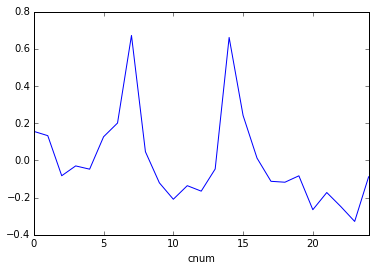

In [123]:
fbars.grocery.plot()

In [129]:
testdf = merge_map_data('results', df)
testdf

010405


,cnum,polygon,color,mapno,fbars
0,0,"POLYGON ((-122.451088 37.749696, -122.451063 3...",#e41a1c,,"[0.12, -0.08, -0.15, -0.07, -0.13, 0.17, 0.09,..."
1,1,"(POLYGON ((-122.436138 37.749562, -122.43832 3...",#ae394d,,"[0.13, 0.27, 0.32, 0.27, 0.16, 0.11, 0.04, 0.3..."
2,2,"(POLYGON ((-122.426737 37.711225, -122.426957 ...",#725c83,,"[0.09, -0.02, -0.05, -0.02, -0.1, 0.27, 0.27, ..."
3,3,POLYGON ((-122.4103819268249 37.77876979913257...,#377eb8,,"[0.09, 0.05, 0.04, 0.17, 0.06, -0.16, -0.21, -..."
4,4,"(POLYGON ((-122.376974 37.733616, -122.377041 ...",#3e8e95,,"[0.04, 0.02, -0.07, -0.01, -0.02, -0.09, 0.05,..."
5,5,"POLYGON ((-122.405744 37.742521, -122.405405 3...",#469e6f,,"[0.01, 0.06, -0.08, -0.06, -0.1, 0.12, 0.29, -..."
6,6,"POLYGON ((-122.443215 37.764558, -122.4432 37....",#4eae4b,,"[0.13, 0.15, 0.12, 0.16, 0.01, 0.36, 0.06, 0.4..."
7,7,"POLYGON ((-122.428255 37.806997, -122.427777 3...",#659067,,"[0.2, 0.75, 0.83, 0.81, 0.38, 0.12, -0.11, 0.4..."
8,8,"POLYGON ((-122.486631 37.712706, -122.488115 3...",#7f6e85,,"[0.08, -0.07, -0.1, -0.09, -0.15, 0.25, 0.26, ..."
9,9,"POLYGON ((-122.475859 37.794251, -122.475813 3...",#994fa1,,"[0.14, -0.16, -0.17, -0.17, -0.15, -0.46, -0.3..."
